In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
from shapely.geometry import Point

In [2]:
datafiles = ["USDA-AMS-Data-and-Metrics\\Food Access\\food_access1.csv",
            "USDA-AMS-Data-and-Metrics\\Food Access\\food_access2.csv",
            "USDA-AMS-Data-and-Metrics\\Business Development and Infrastructure\\business_development_infrastructure.csv",
            "USDA-AMS-Data-and-Metrics\\Grants\\grants.csv",
            "USDA-AMS-Data-and-Metrics\\Indicators of Community Wealth\\community_wealth.csv",
            "USDA-AMS-Data-and-Metrics\\Local Food Sales\\local_food_sales.csv"]

In [3]:
variables = ["pct_laccess_hhnv", 
             "food_banks", 
             "food_desert_1and10", 
             "retail_density_index", 
             "food_insecurity_rate", 
             "SNAP_percent_white_alone", 
             "SNAP_percent_black_alone", 
             "SNAP_percent_indian_alone", 
             "SNAP_percent_asian_alone", 
             "SNAP_percent_native_hawaiian_alone", 
             "SNAP_percent_other_race_alone", 
             "SNAP_percent_two_or_more_races", 
             "SNAP_percent_hispanic_any_race", 
             "SNAP_percent_white_alone_not_hispanic",
             "pct_laccess_white", 
             "pct_laccess_black", 
             "pct_laccess_hisp", 
             "pct_laccess_nhasian", 
             "pct_laccess_nhna", 
             "pct_laccess_nhpi", 
             "pct_laccess_multir", 
             "below_poverty_level_white_alone", 
             "below_poverty_level_black_or_african_american_alone", 
             "below_poverty_level_american_indian_and_alaska_native_alone",
             "below_poverty_level_asian_alone", 
             "below_poverty_level_native_hawaiian_and_other_pacific_islander_alone", 
             "below_poverty_level_some_other_race_alone", 
             "below_poverty_level_two_or_more_races", 
             "below_poverty_level_hispanic_or_latino_origin__of_any_race_", 
             "below_poverty_level_white_alone__not_hispanic_or_latino",
             "below_poverty_level_18_to_34_years", 
             "below_poverty_level_60_years_and_over",
             "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
             "ed_attain",
             "ffrpth",
             "convspth",
             "annual_avg_estabs_count_NAICS 44511 Supermarkets and other grocery stores"]

In [4]:
full_df = pd.read_csv(datafiles[0]).dropna(subset=['county_name'])
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)
full_df = full_df.pivot(index=['fips', 'year'], columns='variable_name', values='value')
columns = [x for x in full_df.columns if x in variables]
full_df = full_df[columns]

for file in datafiles[1:]:
    #read in datasheet and drop anything that is not a county
    data = pd.read_csv(file).dropna(subset=['county_name'])
    #fix dropping of leading zero
    data['fips'] = data['fips'].astype(str).str.zfill(5)
    #create pivoted df
    pivoted_df = data.pivot(index=['fips', 'year'], columns='variable_name', values='value')
    #merge only needed vars with the full dataframe
    columns = [x for x in pivoted_df.columns if x in variables]
    full_df = full_df.combine_first(pivoted_df[columns])
full_df

C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])


variable_name  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips  year                                                          
01001 2015                          NaN                       NaN   
      2016                          NaN                       NaN   
      2017                          0.0                     0.412   
      2018                          0.0                     0.441   
      2019                          0.0                     0.461   
...                                 ...                       ...   
72153 2022                          NaN                       NaN   
74300 2022                          NaN                       NaN   
78010 2022                          NaN                       NaN   
78020 2022                          NaN                       NaN   
78030 2022                          NaN                       NaN   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips  year                                                                 
01001 2015                                NaN                        NaN   
      2016                                NaN                        NaN   
      2017                              0.014                      0.006   
      2018                              0.017                      0.007   
      2019                              0.007                      0.000   
...                                       ...                        ...   
72153 2022                                NaN                        NaN   
74300 2022                                NaN                        NaN   
78010 2022                                NaN                        NaN   
78020 2022                                NaN                        NaN   
78030 2022                                NaN                        NaN   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips  year                                          
01001 2015                                    NaN   
      2016                                    NaN   
      2017                                    0.0   
      2018                                    0.0   
      2019                                    0.0   
...                                           ...   
72153 2022                                    NaN   
74300 2022                                    NaN   
78010 2022                                    NaN   
78020 2022                                    NaN   
78030 2022                                    NaN   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips  year                                                                     
01001 2015                               NaN                             NaN   
      2016                               NaN                             NaN   
      2017                               0.0                           0.009   
      2018                               0.0                           0.018   
      2019                               0.0                           0.024   
...                                      ...                             ...   
72153 2022                               NaN                             NaN   
74300 2022                               NaN                             NaN   
78010 2022                               NaN                             NaN   
78020 2022                               NaN                             NaN   
78030 2022                               NaN                             NaN   

variable_name  SNAP_percent_white_alone  \
fips  year                                
01001 2015                          NaN   
      2016                          NaN   
      2017                        0.573   
      2018                        0.534   
      2019                        0.515   
...                                 ...   
72153 2022                          Na

In [5]:
states = ['02',
            '01',
            '04',
            '05',
            '06',
            '08',
            '09',
            '10',
            '12',
            '13',
            '15',
            '16',
            '17',
            '18',
            '19',
            '20',
            '21',
            '23',
            '24',
            '25',
            '26',
            '27',
            '28',
            '29',
            '30',
            '31',
            '32',
            '33',
            '34',
            '35',
            '36',
            '37',
            '38',
            '39',
            '40',
            '41',
            '42',
            '44',
            '45',
            '46',
            '47',
            '48',
            '49',
            '50',
            '51',
            '53',
            '54',
            '55',
            '56',
            '22',
            '11']

In [6]:
full_df['fips_prefix'] = full_df.index.get_level_values('fips').str[:2]
df_filtered = full_df[full_df['fips_prefix'].isin(states)]

In [7]:
df_filtered = df_filtered.groupby(level='fips').ffill()
df_filtered = df_filtered.loc[df_filtered.index.get_level_values('year') == 2022]
df_filtered

,variable_name,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,below_poverty_level_18_to_34_years,...,pct_laccess_black,pct_laccess_hhnv,pct_laccess_hisp,pct_laccess_multir,pct_laccess_nhasian,pct_laccess_nhna,pct_laccess_nhpi,pct_laccess_white,retail_density_index,fips_prefix
fips,year,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,1755.0,...,0.077266,0.033513,0.008633,0.008848,0.001590,0.001121,0.000162,0.231636,0.128134,01
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,4647.0,...,0.019428,0.019051,0.007560,0.006187,0.001168,0.000997,0.000081,0.139814,0.171615,01
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,1514.0,...,0.098814,0.043294,0.018552,0.016840,0.000623,0.001455,0.000294,0.103029,0.198475,01
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,829.0,...,0.018289,0.028214,0.000375,0.000230,0.000087,0.000110,0.000000,0.023588,0.182554,01
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,1362.0,...,0.001672,0.033364,0.008679,0.003540,0.000147,0.000505,0.000018,0.059091,0.112796,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,1281.0,...,0.004252,0.021828,0.060753,0.036648,0.002619,0.004329,0.000633,0.383760,0.124511,56
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,726.0,...,0.000427,0.005402,0.034572,0.021623,0.002512,0.001525,0.000398,0.265259,0.322541,56
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,449.0,...,0.000710,0.027599,0.025363,0.016589,0.000655,0.001910,0.000312,0.201721,0.170996,56


In [2]:
data = pd.read_csv("USDA-AMS-Data-and-Metrics\\Point level data\\point_data.csv")
data['fips'] = data['fips'].astype(str).str.zfill(5)
data

,fips,state_name,county_name,lat,long,org_type,variable_name
0,06057,California,Nevada County,39.320260,-120.150670,Food Hub,location_food_hub
1,35045,New Mexico,San Juan County,36.773792,-108.167380,Food Hub,location_food_hub
2,37099,North Carolina,Jackson County,35.322406,-83.157802,Food Hub,location_food_hub
3,19191,Iowa,Winneshiek County,43.298101,-91.787872,Food Hub,location_food_hub
4,06075,California,San Francisco County,37.750507,-122.389110,Food Hub,location_food_hub
...,...,...,...,...,...,...,...
12989,32003,Nevada,Clark County,36.142355,-115.206409,Colleges and universities,location_colleges_universities
12990,32003,Nevada,Clark County,36.117236,-115.158173,Colleges and universities,location_colleges_universities
12991,34007,New Jersey,Camden County,39.939428,-75.015417,Colleges and universities,location_colleges_universities
12992,06029,California,Kern County,35.339951,-119.035082,Colleges and universities,location_colleges_universities


In [4]:
! pip uninstall geopandas


^C


In [3]:
filename = "countiesWithStatesAndPopulation.shp"
map_data = geopandas.read_file(filename = filename)
map_data["FIPS"] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
map_data['FIPS'] = map_data['FIPS'].astype(str).str.zfill(5)
map_data = map_data.set_index("FIPS")
map_data = map_data[["NAME", "State", "geometry"]]
map_data = map_data.sort_index()
map_data

CRSError: Invalid projection: EPSG:4269: (Internal Proj Error: proj_create: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name)

In [10]:
# map_data["Centroid"] = map_data["geometry"].centroid
# map_data["Rep Point"] = map_data["geometry"].representative_point()
filename = "Centers of Population.csv"
centers = pd.read_csv(filename)
centers["FIPS"] = centers["STATEFP"].astype(str).str.zfill(2) + centers["COUNTYFP"].astype(str).str.zfill(3)
centers = centers.set_index("FIPS")
map_data[["LATITUDE","LONGITUDE"]] = centers[["LATITUDE","LONGITUDE"]]
map_data["center"] = map_data.apply(lambda row: Point(row['LONGITUDE'], row['LATITUDE']), axis=1)
map_data.dropna(inplace = True)
map_data

C:\Users\hthog\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,NAME,State,geometry,LATITUDE,LONGITUDE,center
FIPS,,,,,,
01001,Autauga,Alabama,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",32.500194,-86.487813,POINT (-86.48781 32.50019)
01003,Baldwin,Alabama,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",30.537396,-87.761478,POINT (-87.76148 30.53740)
01005,Barbour,Alabama,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",31.843981,-85.301306,POINT (-85.30131 31.84398)
01007,Bibb,Alabama,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",33.032236,-87.136826,POINT (-87.13683 33.03224)
01009,Blount,Alabama,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",33.954604,-86.592667,POINT (-86.59267 33.95460)
...,...,...,...,...,...,...
56037,Sweetwater,Wyoming,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",41.580564,-109.302521,POINT (-109.30252 41.58056)
56039,Teton,Wyoming,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",43.491744,-110.785815,POINT (-110.78581 43.49174)
56041,Uinta,Wyoming,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",41.271502,-110.760395,POINT (-110.76040 41.27150)


(-200.0, -50.0)

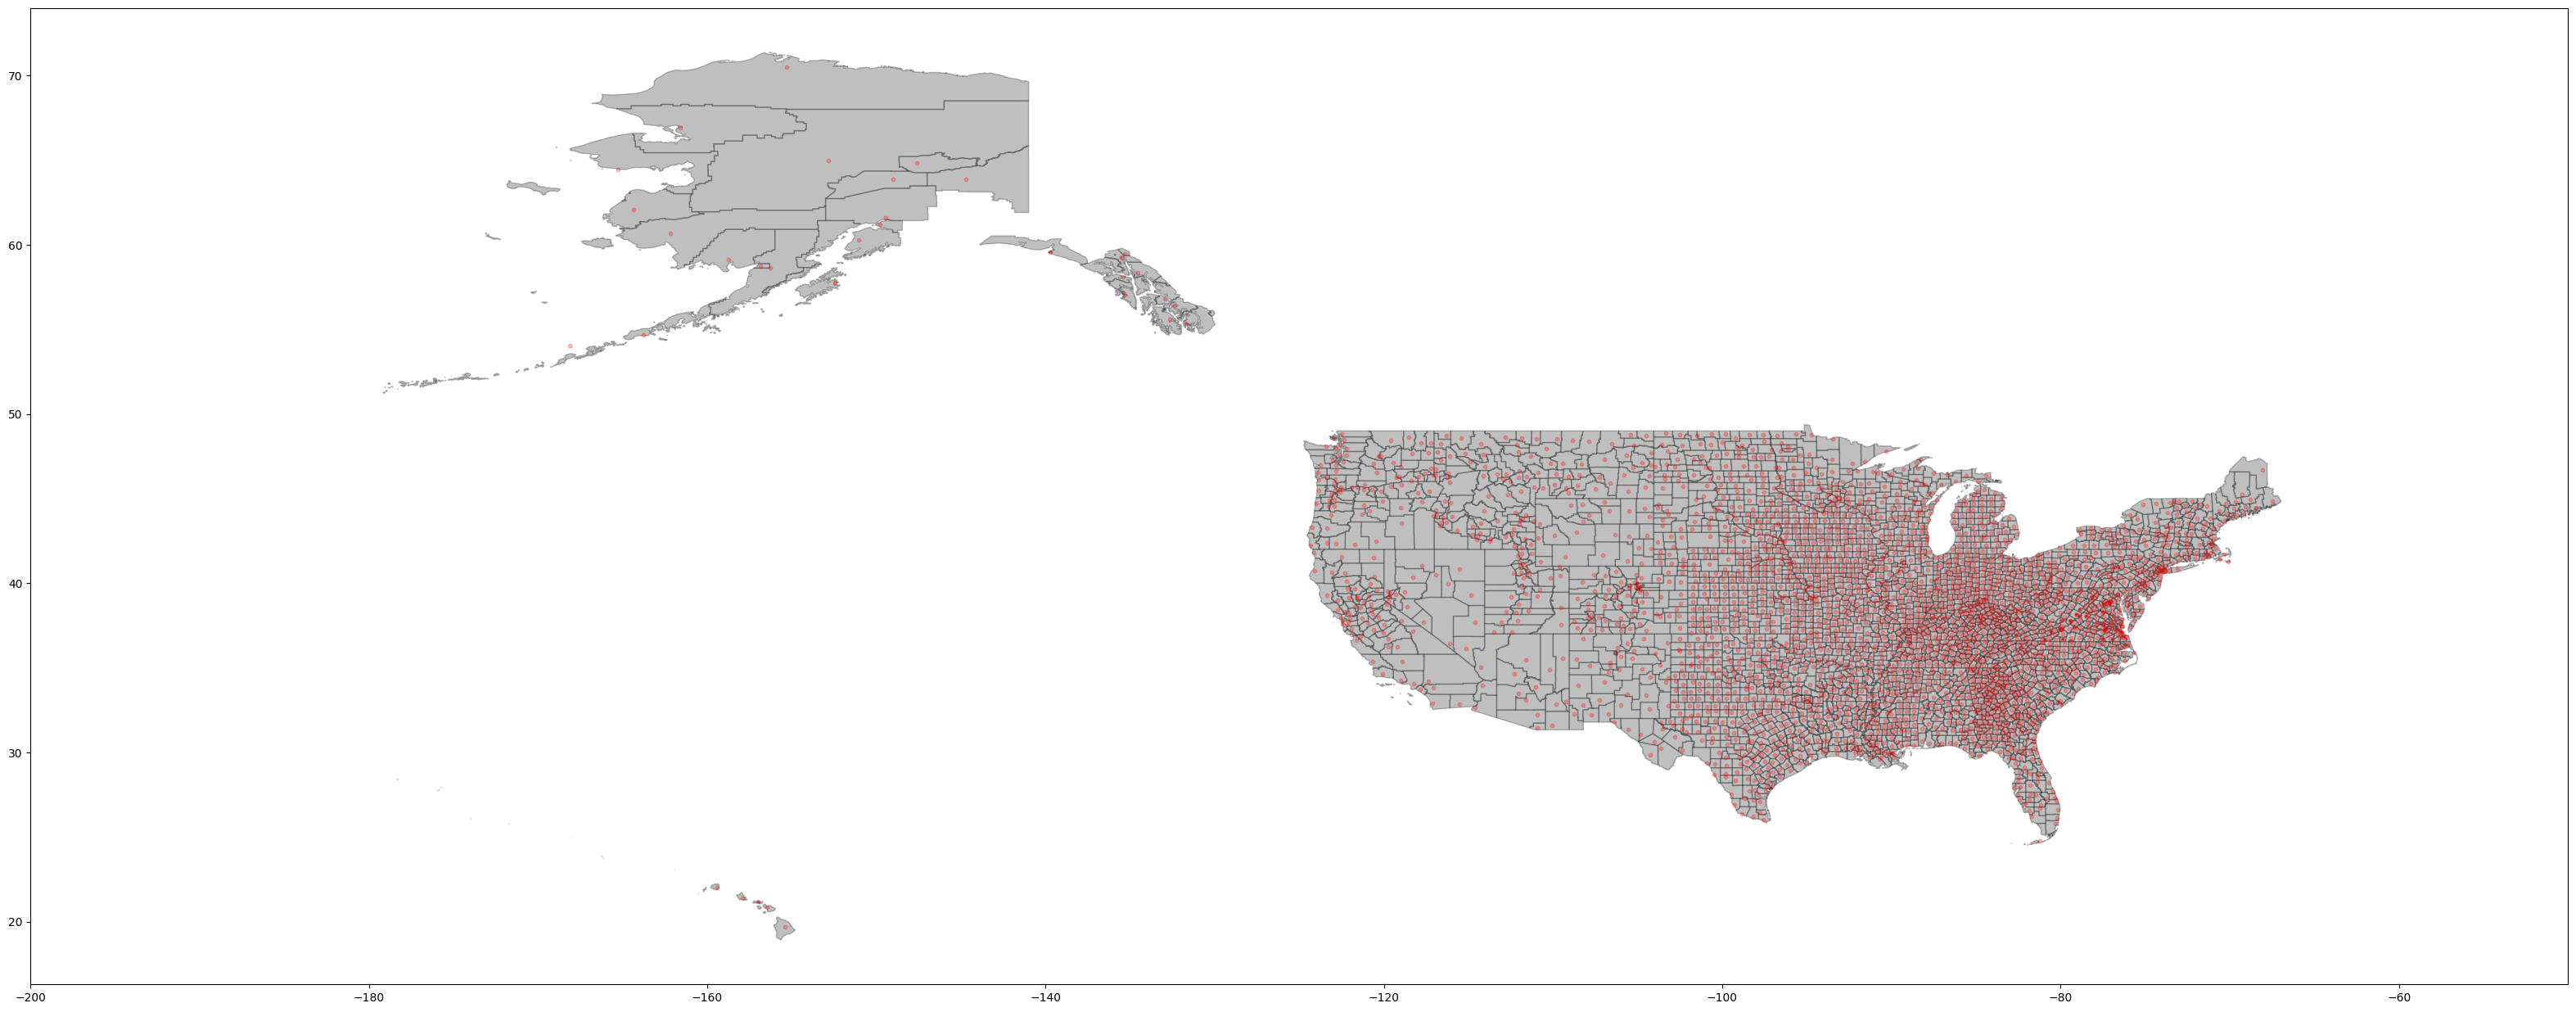

In [11]:
fig, ax = plt.subplots(figsize=(40,80))
map_data["geometry"].plot(color="k", alpha=0.25, ax=ax, edgecolor="k")
map_data["center"].plot(marker='o', color='red', markersize=10, alpha=.25, ax=ax)
x_min = -200
x_max = -50
plt.xlim(x_min, x_max)

In [12]:
df_filtered.reset_index(level='year', inplace=True)

In [13]:
df_filtered[["geometry","center"]] = map_data[["geometry", "center"]]

In [14]:
df_filtered = df_filtered.dropna(how="any", axis = 0)

In [15]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = earth_radius * c

    return distance

In [16]:
# Initialize the counts as zero
df_filtered["college_region"] = 0
df_filtered["csa_region"] = 0
df_filtered["fm_region"] = 0
df_filtered["fh_region"] = 0
df_filtered["mp_region"] = 0

# Filter the data DataFrame by org_type once
colleges = data[data["org_type"] == "Colleges and universities"]
csas = data[data["org_type"] == "Community Supported Agriculture (CSA)"]
farmers_markets = data[data["org_type"] == "Farmers Market"]
food_hubs = data[data["org_type"] == "Food Hub"]
meat_processors = data[data["org_type"] == "Meat processor"]

for i, row in df_filtered.iterrows():
    point1x = row["center"].x
    point1y = row["center"].y

    # Calculate distances for each org_type and count within the given distance threshold
    college_count = ((calculate_distance(point1y, point1x, colleges["lat"], colleges["long"]) <= 563.2704).sum())
    csa_count = ((calculate_distance(point1y, point1x, csas["lat"], csas["long"]) <= 563.2704).sum())
    fm_count = ((calculate_distance(point1y, point1x, farmers_markets["lat"], farmers_markets["long"]) <= 563.2704).sum())
    fh_count = ((calculate_distance(point1y, point1x, food_hubs["lat"], food_hubs["long"]) <= 563.2704).sum())
    mp_count = ((calculate_distance(point1y, point1x, meat_processors["lat"], meat_processors["long"]) <= 563.2704).sum())

    # Assign the counts to the respective columns
    df_filtered.at[i, "college_region"] = college_count
    df_filtered.at[i, "csa_region"] = csa_count
    df_filtered.at[i, "fm_region"] = fm_count
    df_filtered.at[i, "fh_region"] = fh_count
    df_filtered.at[i, "mp_region"] = mp_count

C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\1880503623.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["college_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\1880503623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["csa_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_22608\1880503623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [17]:
df_filtered

variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,pct_laccess_white,retail_density_index,fips_prefix,geometry,center,college_region,csa_region,fm_region,fh_region,mp_region
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,0.231636,0.128134,01,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",POINT (-86.48781 32.50019),669,2,52,1,612
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,0.139814,0.171615,01,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",POINT (-87.76148 30.53740),447,1,31,0,419
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,0.103029,0.198475,01,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",POINT (-85.30131 31.84398),720,3,51,1,635
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,0.023588,0.182554,01,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",POINT (-87.13683 33.03224),683,2,57,1,630
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,0.059091,0.112796,01,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",POINT (-86.59267 33.95460),774,5,73,2,697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,0.383760,0.124511,56,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",POINT (-109.30252 41.58056),194,4,21,4,231
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,0.265259,0.322541,56,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",POINT (-110.78581 43.49174),128,5,12,2,143
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,0.201721,0.170996,56,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",POINT (-110.76040 41.27150),193,5,17,4,223


In [19]:
df_filtered.to_excel("50 States Data with Points.xlsx")

In [20]:
scores_df = pd.DataFrame(index=df_filtered.index)
scores_df

""
fips
01001
01003
01005
01007
01009
...
56037
56039
56041


In [21]:
scores_df[["pct_laccess_hhnv", "center", "geometry", "fips_prefix",
          "retail_density_index", "food_insecurity_rate", 
          "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
          "ed_attain"]] = df_filtered[["pct_laccess_hhnv", "center", "geometry", "fips_prefix",
          "retail_density_index", "food_insecurity_rate", 
          "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
          "ed_attain"]]
scores_df.dropna(axis=1).describe()

,pct_laccess_hhnv,retail_density_index,food_insecurity_rate,below_poverty_level_percent_civilian_labor_force_16_years_and_over,ed_attain
count,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000
mean,0.031634,0.178477,0.130892,0.082681,0.243766
std,0.022304,0.076593,0.036950,0.037531,0.117417
min,0.000000,0.000000,0.029000,0.000000,0.024390
25%,0.016965,0.129854,0.105000,0.057000,0.163000
50%,0.026779,0.161695,0.129000,0.077000,0.216000
75%,0.040249,0.207600,0.155250,0.101000,0.292000
max,0.273272,0.759001,0.294000,0.321000,1.219000


In [22]:
def score_positive_integer_good(value):
    if value == 0:
        return 0
    else:
        return (1 / value)
    
def score_positive_integer_bad(value):
        return (1 - score_positive_integer_good(value))

def score_positive_decimal_bad(value):
    if value == 0:
        return 0
    else:
        return (1 / (value + 1))
    
def score_positive_decimal_good(value):
        return (1 - score_positive_integer_bad(value))
    
def calculate_difference(row):
    maximum = row.max()
    minimum = row.min()
    return 1 - (maximum - minimum)

scores_df["food_banks"] = df_filtered["food_banks"].apply(score_positive_integer_good)
scores_df["food_desert_1and10"] = df_filtered["food_desert_1and10"].apply(score_positive_integer_bad)
scores_df["ffrpth"] = df_filtered["ffrpth"].apply(score_positive_decimal_bad)
scores_df["convspth"] = df_filtered["convspth"].apply(score_positive_decimal_bad)
scores_df['SNAP Inequality'] = df_filtered[["SNAP_percent_white_alone",
                                           "SNAP_percent_black_alone",
                                           "SNAP_percent_indian_alone",
                                           "SNAP_percent_asian_alone",
                                           "SNAP_percent_native_hawaiian_alone",
                                           "SNAP_percent_other_race_alone",
                                           "SNAP_percent_two_or_more_races",
                                           "SNAP_percent_hispanic_any_race",
                                           "SNAP_percent_white_alone_not_hispanic",
                                           ]].apply(calculate_difference, axis=1)
scores_df['LAccess Inequality'] = df_filtered[["pct_laccess_white", 
                                               "pct_laccess_black", 
                                               "pct_laccess_hisp", 
                                               "pct_laccess_nhasian", 
                                               "pct_laccess_nhna", 
                                               "pct_laccess_nhpi", 
                                               "pct_laccess_multir"]].apply(calculate_difference, axis=1)
# Variables in the two scores below this need 
# to be converted to percentages of population 
scores_df['Poverty Inequality'] = df_filtered[["below_poverty_level_white_alone", 
                                               "below_poverty_level_black_or_african_american_alone", 
                                               "below_poverty_level_american_indian_and_alaska_native_alone", 
                                               "below_poverty_level_asian_alone", 
                                               "below_poverty_level_native_hawaiian_and_other_pacific_islander_alone",
                                               "below_poverty_level_some_other_race_alone", 
                                               "below_poverty_level_two_or_more_races", 
                                               "below_poverty_level_hispanic_or_latino_origin__of_any_race_", 
                                               "below_poverty_level_white_alone__not_hispanic_or_latino"]].apply(calculate_difference, axis=1)
scores_df['Age Poverty Inequality'] = df_filtered[["below_poverty_level_18_to_34_years", 
                                                   "below_poverty_level_60_years_and_over"]].apply(calculate_difference, axis=1)

scores_df.dropna(axis=1).describe()

,pct_laccess_hhnv,retail_density_index,food_insecurity_rate,below_poverty_level_percent_civilian_labor_force_16_years_and_over,ed_attain,food_banks,food_desert_1and10,ffrpth,convspth,SNAP Inequality,LAccess Inequality,Poverty Inequality,Age Poverty Inequality
count,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000,3044.000000
mean,0.031634,0.178477,0.130892,0.082681,0.243766,0.086399,0.630352,0.605975,0.634593,0.192561,0.805659,-8456.030223,-1500.973390
std,0.022304,0.076593,0.036950,0.037531,0.117417,0.280999,0.394354,0.163464,0.114563,0.158816,0.174315,25606.411401,4919.780606
min,0.000000,0.000000,0.029000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.008368,-809340.000000,-97998.000000
25%,0.016965,0.129854,0.105000,0.057000,0.163000,0.000000,0.500000,0.563504,0.576733,0.057000,0.758062,-6929.000000,-705.000000
50%,0.026779,0.161695,0.129000,0.077000,0.216000,0.000000,0.750000,0.619029,0.645503,0.146000,0.842647,-3009.000000,-220.000000
75%,0.040249,0.207600,0.155250,0.101000,0.292000,0.000000,1.000000,0.684421,0.708536,0.310000,0.909732,-1233.250000,-73.000000
max,0.273272,0.759001,0.294000,0.321000,1.219000,1.000000,1.000000,0.957076,0.932237,0.732000,1.000000,1.000000,1.000000


In [23]:
scores_df.to_excel("Scored_variables.xlsx")